Matplotlib is building the font cache; this may take a moment.


[[1 3 1 ... 0 3 3]
 [2 1 0 ... 0 1 1]
 [2 0 1 ... 2 3 2]
 ...
 [2 0 0 ... 0 1 1]
 [0 0 0 ... 1 0 1]
 [1 1 1 ... 1 2 2]]


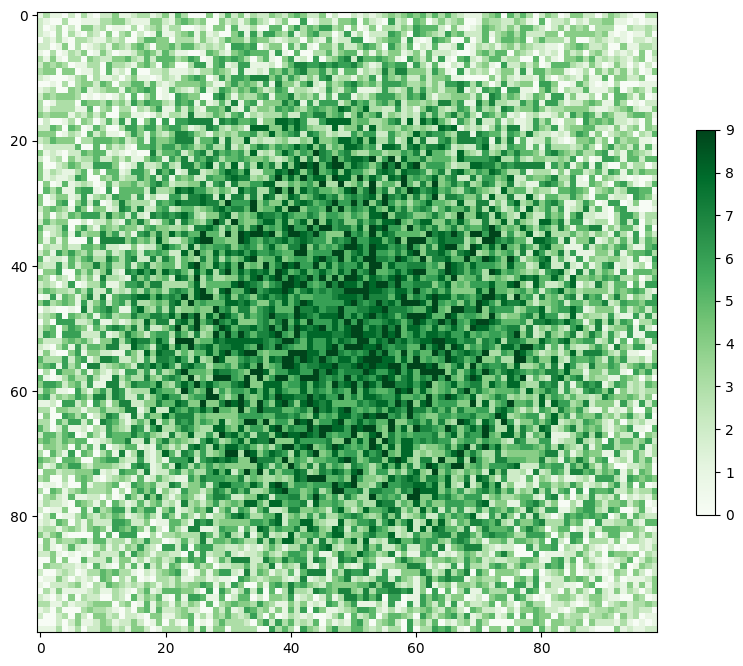

In [2]:
import numpy as np
import matplotlib.pyplot as plt

small = False

if small:
    with open('input8_small.txt') as f:
        data = f.read().splitlines()
else:
    with open('input8.txt') as f:
        data = f.read().splitlines()

df = [[int(x) for x in cell] for cell in data]
trees = np.array(df)
print(trees)
fig, ax = plt.subplots(figsize=(10,10))
im = plt.imshow(trees,cmap ='Greens')
cbar = ax.figure.colorbar(im,
                          ax=ax,
                          shrink=0.5)


In [3]:
def check_up(x,y):
    for i in trees[0:x,y]:
        if i >= trees[x,y]:
            return 0
    return 1

def check_down(x,y):
    for i in trees[x+1:,y]:
        if i >= trees[x,y]:
            return 0
    return 1
    
def check_left(x,y):
    for i in trees[x,:y]:
        if i >= trees[x,y]:
            return 0
    return 1
    
def check_right(x,y):
    for i in trees[x,y+1:]:
        if i >= trees[x,y]:
            return 0
    return 1            

Answer 1: 1719


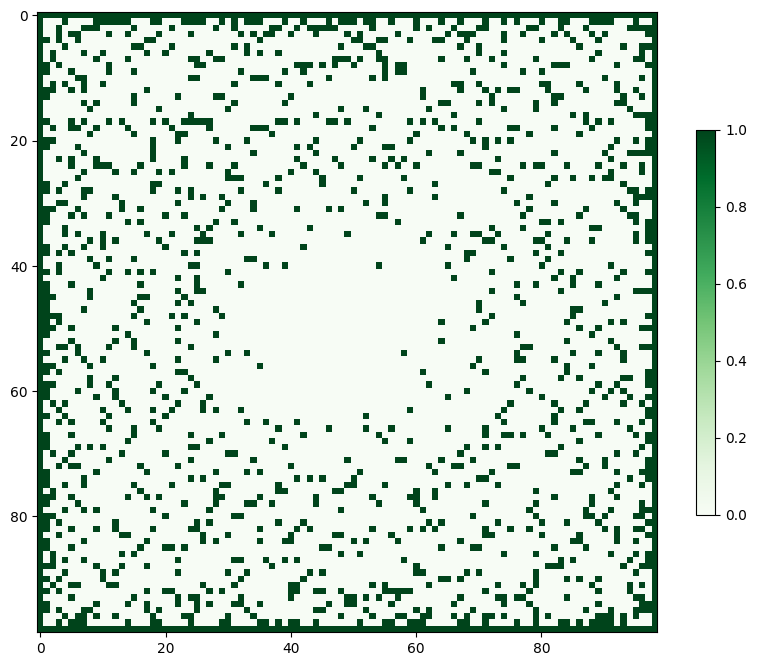

In [4]:
visible_trees = np.zeros(trees.shape)

for i in range(1,trees.shape[0]): #rows
    for j in range(1,trees.shape[1]): #columns
        visible_trees[i,j] = max(check_up(i,j),check_down(i,j),check_left(i,j),check_right(i,j))

visible_trees[0,:] = 1
visible_trees[-1,:] = 1
visible_trees[:,0] = 1
visible_trees[:,-1] = 1

print(f'Answer 1: {int(visible_trees.sum())}')

fig, ax = plt.subplots(figsize=(10,10))
im = plt.imshow(visible_trees,cmap ='Greens')
cbar = ax.figure.colorbar(im,
                          ax=ax,
                          shrink=0.5)

In [5]:
def check_up_visible(x,y):
    sum = 0
    for i in reversed(trees[0:x,y]):
        if i >= trees[x,y]:
            sum += 1
            return sum
        else:
            sum += 1
    return sum

def check_down_visible(x,y):
    sum = 0
    for i in trees[x+1:,y]:
        if i >= trees[x,y]:
            sum += 1
            return sum
        else: 
            sum += 1
    return sum
    
def check_left_visible(x,y):
    sum = 0
    for i in reversed(trees[x,:y]):
        if i >= trees[x,y]:
            sum += 1
            return sum
        else:
            sum += 1
    return sum
    
def check_right_visible(x,y):
    sum = 0
    for i in trees[x,y+1:]:
        if i >= trees[x,y]:
            sum += 1
            return sum
        else:
            sum += 1
    return sum
    




Answer 2: 590824


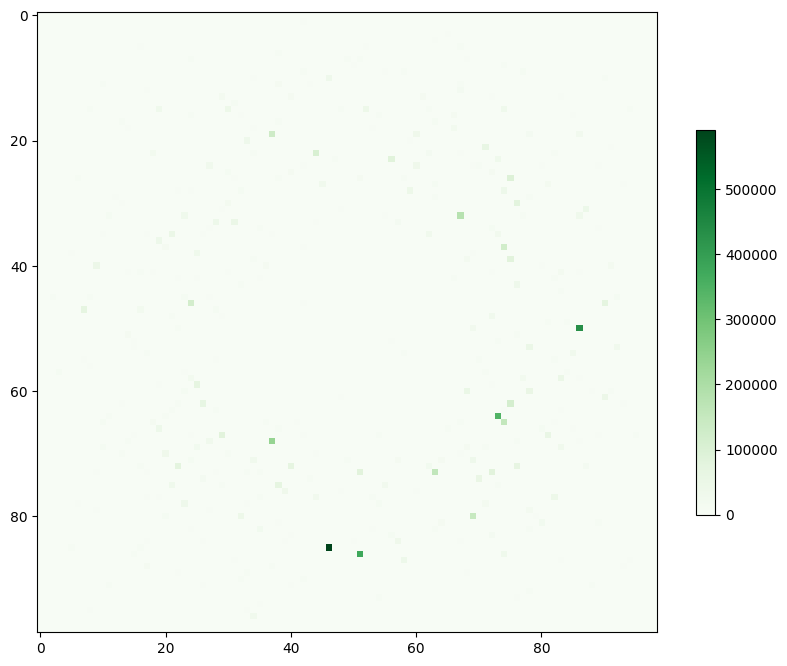

In [6]:
scenic_score = np.zeros(trees.shape)

for i in range(1,trees.shape[0]): #rows
    for j in range(1,trees.shape[1]): #columns
        scenic_score[i,j] = check_up_visible(i,j)*check_down_visible(i,j)*check_left_visible(i,j)*check_right_visible(i,j)

print(f'Answer 2: {int(scenic_score.max())}')

fig, ax = plt.subplots(figsize=(10,10))
im = plt.imshow(scenic_score,cmap ='Greens')
cbar = ax.figure.colorbar(im,
                          ax=ax,
                          shrink=0.5)